### 题目：波士顿房价预测

#### 任务描述

你将使用波士顿房价数据集来建立一个线性回归模型，预测波士顿各区域的房价。完成以下步骤，并回答相应问题。

#### 数据集

波士顿房价数据集包含506个数据点，每个数据点有14个特征。数据集的主要特征如下：

1. **CRIM**: 城镇人均犯罪率
2. **ZN**: 占地面积超过2.5万平方英尺的住宅用地比例
3. **INDUS**: 城镇非零售业务地区的比例
4. **CHAS**: 查尔斯河虚拟变量 (1 如果土地在河边；否则是0)
5. **NOX**: 一氧化氮浓度（每1000万份）
6. **RM**: 平均每居民房数
7. **AGE**: 在1940年之前建成的所有者占用单位的比例
8. **DIS**: 与五个波士顿就业中心的加权距离
9. **RAD**: 公共交通便利指数
10. **TAX**: 每1万美元的不动产税率
11. **PIRATIO**: 城镇教师学生比例
12. **B**: 城镇黑人比例
13. **LSTAT**: 地区人口中地位低下者比例
14. **MEDV**: 自住房的中位价格（以千美元计）

### 导入相应的数据分析包

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 数据读取并查看数据的详细信息

In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PIRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
time: 18.7 ms


### 数据透视

In [3]:
print(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


time: 16.9 ms


In [4]:
print(data.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


time: 79.2 ms


### 数据可视化（相关系数的可视化——热力图）

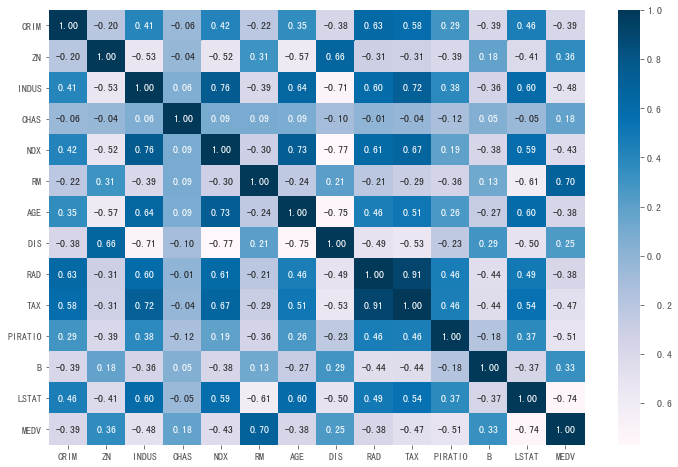

time: 1.02 s


In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='PuBu')
plt.show()

### 数据可视化（相关系数的可视化——热力图）绝对值

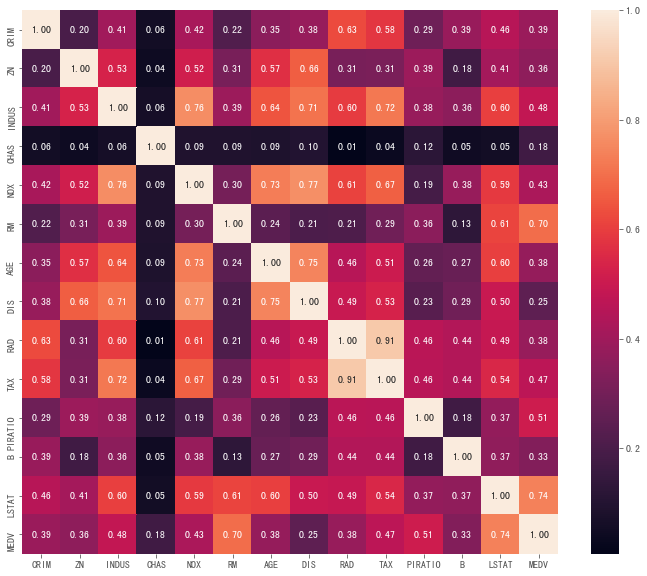

time: 1.02 s


In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().abs(),annot=True,fmt='.2f')
plt.show()

### 按照相关系数的绝对值排序

In [7]:
data.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PIRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

time: 5.12 ms


### 数据可视化（散点图矩阵）

In [8]:
print(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


time: 15.3 ms


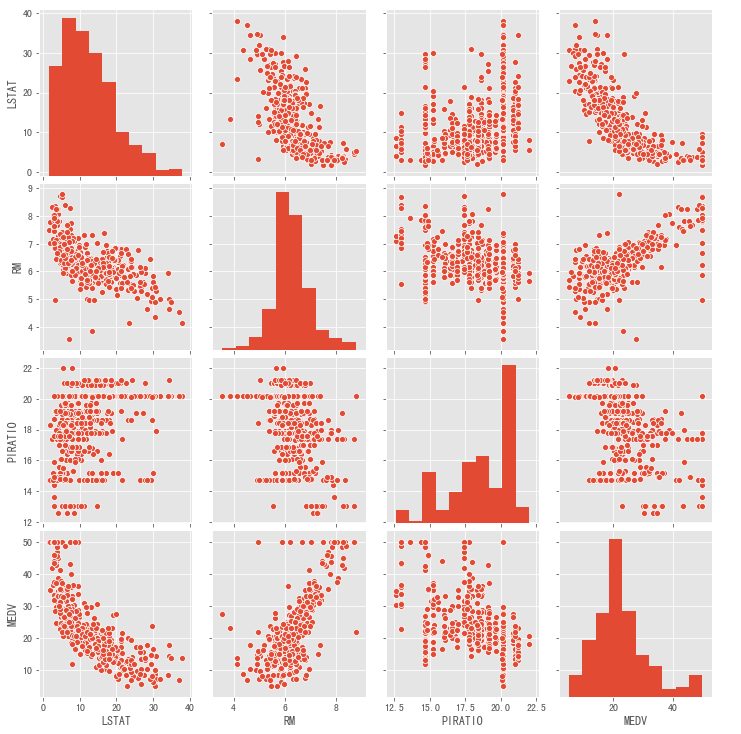

time: 2.13 s


In [9]:
print("不会写")

### 数据集的划分

In [10]:
# 使用线性回归模型
X ,y = data[data.columns.delete(-1)], data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

time: 4.23 ms


In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)
time: 8.6 ms


In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
coef = linear_model.coef_
line_pre = linear_model.predict(X_test)
print('SCORE:{:.4f}'.format(linear_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))
coef

SCORE:0.7559
RMSE:4.3708


array([-1.19007229e-01,  3.64055815e-02,  1.68552680e-02,  2.29397031e+00,
       -1.60706448e+01,  3.72371469e+00,  9.22765437e-03, -1.30674803e+00,
        3.43072685e-01, -1.45830386e-02, -9.73486692e-01,  7.89797436e-03,
       -5.72555056e-01])

time: 28 ms


In [13]:
df_coef = pd.DataFrame()
df_coef['Title'] = data.columns.delete(-1)
df_coef['Coef'] = coef
df_coef

,Title,Coef
0,CRIM,-0.119007
1,ZN,0.036406
2,INDUS,0.016855
3,CHAS,2.293970
4,NOX,-16.070645
5,RM,3.723715
6,AGE,0.009228
7,DIS,-1.306748
8,RAD,0.343073
9,TAX,-0.014583


time: 11.6 ms


### 模型评估

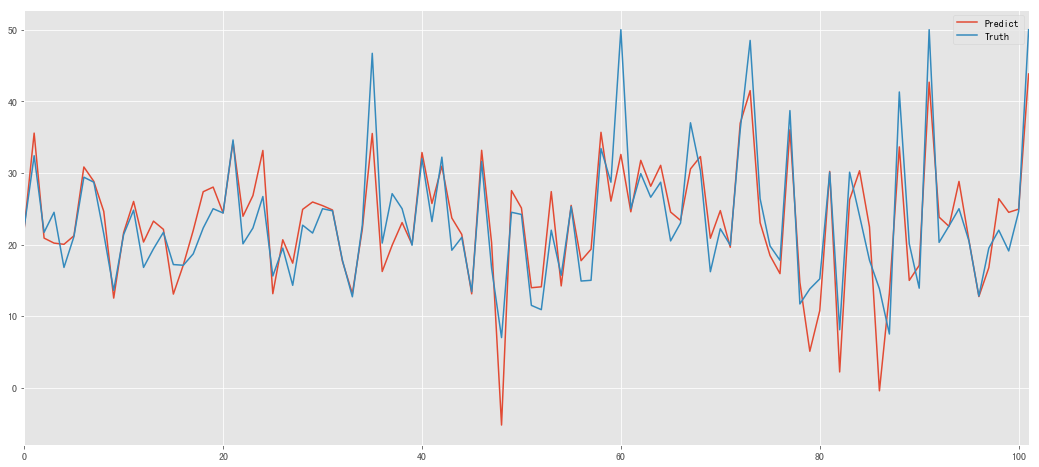

time: 398 ms


In [14]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y_test.reset_index(drop=True)
hos_pre.plot(figsize=(18,8))

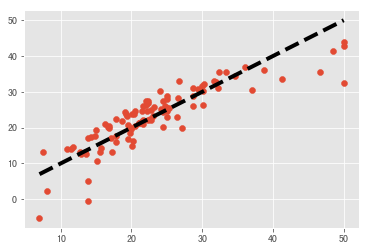

time: 161 ms


In [15]:
plt.scatter(y_test, line_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

In [ ]:
# 使用线性回归模型
# hos_pre = pd.DataFrame()
# hos_pre['Predict'] = line_pre
# hos_pre['Truth'] = y_test.reset_index(drop=True)
# hos_pre.plot(figsize=(18,10))

In [ ]:
line_pre_all = linear_model.predict(X)  #预测值
print('SCORE:{:.4f}'.format(linear_model.score(X,y)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y, line_pre_all))))
hos_pre_all = pd.DataFrame()
hos_pre_all['Predict'] = line_pre_all
hos_pre_all['Truth'] = y
hos_pre_all.plot(figsize=(18,8))

In [19]:
data.corr()['MEDV'].abs().sort_values(ascending=False).head(4)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PIRATIO    0.507787
Name: MEDV, dtype: float64

time: 4.82 ms
